# i2i Widgets

In [25]:
from vega import Vega 
import json
import pandas as pd
import numpy as np

**VegaConfig file**

In [34]:
Config="""
{
    "range": {
      "category": ["#2f939c","#97c9ce","#001d22","#f9d031","#f95e31", "#FCAE98", "#633AE8", "#E4D081", "#00D9C6", "#B9A86C", "#7B0051", "#B685C9", "#076270", "#8ADF70"]
      }
}
"""

## Pie

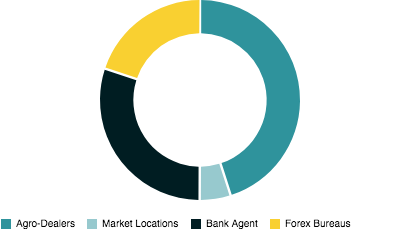

In [27]:
specV3=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 500,
  "height": 500,
  "data": [
    {
      "name": "table",
      "values":[
        {"label":"Agro-Dealers", "value":45},
        {"label":"Market Locations", "value":5},
        {"label":"Bank Agent", "value":30},
        {"label":"Forex Bureaus", "value":20}
      ],
      "transform": [
        {
          "type": "window",
          "ops": ["row_number"], "as": ["rank"]
        },
        {
          "type": "formula",
          "as": "category",
          "expr": "datum.rank < 14 ? datum.label : 'Others'"
        },
        {
          "type": "aggregate",
          "groupby": ["category"],
          "ops": ["sum"],
          "fields": ["value"],
          "as": ["value"]
        },
        {
          "type": "pie",
          "field": "value",
          "startAngle":  0,
          "endAngle":  6.29
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "c",
      "type": "ordinal",
      "range": "category",
      "domain": { "data": "table", "field": "category" }
    }
  ],
  "legends": [
      {
    "fill": "c",
    "orient":"bottom",
    "direction":"horizontal",
    "symbolType":"square"
    }
  ],
  "marks": [
    {
      "type": "arc",
      "from": { "data": "table" },
      "encode": {
        "enter": {
          "fill": { "scale": "c", "field": "category" },
          "x": { "signal": "width / 2" },
          "y": { "signal": "height / 2" }
        },
        "update": {
          "opacity": { "value": 1 },
          "startAngle": { "field": "startAngle" },
          "endAngle": { "field": "endAngle" },
          "padAngle": { "signal": 0.02 },
          "innerRadius": { "signal": "width > height ? height / 3 : width / 3" },
          "outerRadius": { "signal": "width > height ? height / 2 : width / 2" }
        },
        "hover":{
          "opacity":{"value":0.8}
        }
      }
    }
  ],
  "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "value",
            "property": "value",
            "type": "number",
            "format": ".2s"
          },
          {
            "column": "category",
            "property": "category",
            "type": "string"
          }
        ]
      }
    }
  ]
}
""")
vega4view=dict(specV3)
vega4view['config']=json.loads(Config)
vega4view['width']=400
vega4view['height']=200
Vega(vega4view)

## Grouped bar

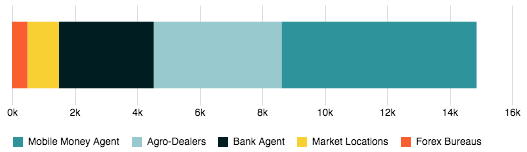

In [31]:
specV3=json.loads("""
{
 "$schema": "https://vega.github.io/schema/vega/v4.json",
 "width": 500,
 "height": 100,
 "padding": 5,
 "data": [
   {
     "name": "table",
     "values": [
       {"unit": "km", "value": 8621, "label":"Agro-Dealers"},
       {"unit": "km", "value": 1500, "label":"Market Locations"},
       {"unit": "km", "value": 4535, "label":"Bank Agent"},
       {"unit": "km", "value": 495, "label":"Forex Bureaus"},
       {"unit": "km", "value": 14867, "label":"Mobile Money Agent"}
     ],
     "transform": [
      {
        "type": "window",
        "sort": {"field": "value", "order": "ascending"},
        "ops": ["lag"],
        "fields": ["value"],
        "as": ["sd"]
      }, 
      {"type": "formula", "as": "x", "expr": "datum.sd==null ? 0 : datum.sd"},
        {
          "type": "collect",
          "sort": {"field": "value",
          "order":"descending"}
        }
     ]
   }
 ],
 "scales": [
   {
     "name": "y",
     "type": "band",
     "range": "height",
     "domain": {"data": "table", "field": "unit"},
     "padding": 0.2
   },
   {
     "name": "x",
     "type": "linear",
     "range": "width",
     "nice": true, "zero": true,
     "domain": {"data": "table", "field": "value"}
   },
   {
     "name": "color",
     "type": "ordinal",
     "range": "category",
     "domain": {"data": "table", "field": "label"}
   }
 ],
 "axes": [
   {
     "orient": "bottom",
     "scale": "x",
     "domain": false,
     "ticks":false,
     "grid": true,
     "format":"s"
   },
   {"orient": "left",
    "scale": "y",
    "domain": false,
     "ticks":false,
     "labels":false
   }
 ],
   "legends": [
     {
       "fill": "color",
       "orient":"bottom",
       "direction":"horozontal",
       "symbolType":"square"
   }
 ],
 "marks": [
   {
     "type": "rect",
     "from": {"data": "table"},
     "encode": {
       "enter": {
         "y": {"scale": "y", "field": "unit"},
         "height": {"scale": "y", "band": 1, "offset": 0},
         "x": {"scale": "x", "field": "x"},
         "x2": {"scale": "x", "field": "value"},
         "fill": {"scale": "color", "field": "label"}
       },
       "update": {
         "fillOpacity": {"value": 1}
       },
       "hover": {
         "fillOpacity": {"value": 0.8}
       }
     }
   }
 ]
}
""")
vega4view=dict(specV3)
vega4view['config']=json.loads(Config)
vega4view['width']=500
vega4view['height']=100
Vega(vega4view)

## Stacked bar

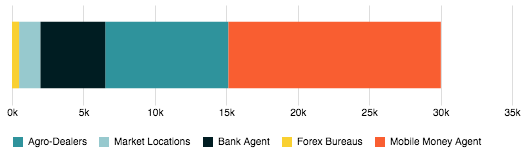

In [29]:
specV3=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 500,
  "height": 100,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {"unit": "km", "value": 8621, "label":"Agro-Dealers"}, 
        {"unit": "km", "value": 1500, "label":"Market Locations"}, 
        {"unit": "km", "value": 4535, "label":"Bank Agent"},
        {"unit": "km", "value": 495, "label":"Forex Bureaus"},
        {"unit": "km", "value": 14867, "label":"Mobile Money Agent"}
      ],
      "transform": [
      {
        "type": "stack",
        "groupby": ["unit"],
        "field": "value",
        "sort": {"field": "value", "order": "ascending"}
      }
      ]
    }
  ],

  "scales": [
    {
      "name": "y",
      "type": "band",
      "range": "height",
      "domain": {"data": "table", "field": "unit"},
      "padding": 0.2
    },
    {
      "name": "x",
      "type": "linear",
      "range": "width",
      "nice": true, "zero": true,
      "domain": {"data": "table", "field": "y1"}
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": {"data": "table", "field": "label"}
    }
  ],

  "axes": [
    {
      "orient": "bottom", 
      "scale": "x",
      "domain": false,
      "ticks":false,
      "grid": true,
      "format":"s"     
    },
    {"orient": "left",
     "scale": "y",
     "domain": false,
      "ticks":false,
      "labels":false
    }
  ],

    "legends": [
      {
        "fill": "color",
        "orient":"bottom",
        "direction":"horozontal",
        "symbolType":"square"
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "table"},
      "encode": {
        "enter": {
          "y": {"scale": "y", "field": "unit"},
          "height": {"scale": "y", "band": 1, "offset": 0},
          "x": {"scale": "x", "field": "y1"},
          "x2": {"scale": "x", "field": "y0"},
          "fill": {"scale": "color", "field": "label"}
        },
        "update": {
          "fillOpacity": {"value": 1}
        },
        "hover": {
          "fillOpacity": {"value": 0.8}
        }
      }
    }
  ]
}
""")
vega4view=dict(specV3)
vega4view['config']=json.loads(Config)
vega4view['width']=500
vega4view['height']=100
Vega(vega4view)

## Bar

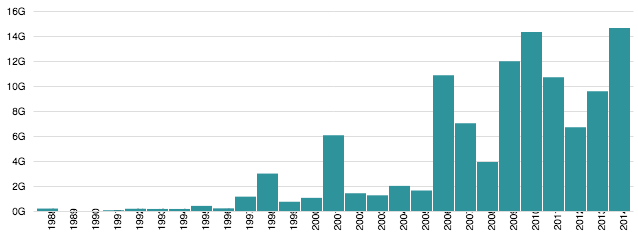

In [30]:
specV3=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 600,
  "height": 200,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {
          "label": "1988",
          "value": 194445891.422256
        },
        {
          "label": "1989",
          "value": 2833971.379585
        },
        {
          "label": "1990",
          "value": 3626517.554737
        },
        {
          "label": "1991",
          "value": 64153783.8160579
        },
        {
          "label": "1992",
          "value": 178086673.922812
        },
        {
          "label": "1993",
          "value": 163780990.237235
        },
        {
          "label": "1994",
          "value": 162722524.1263
        },
        {
          "label": "1995",
          "value": 408208500.540502
        },
        {
          "label": "1996",
          "value": 211114044.840692
        },
        {
          "label": "1997",
          "value": 1147622993.51572
        },
        {
          "label": "1998",
          "value": 2994001862.09516
        },
        {
          "label": "1999",
          "value": 739329848.594064
        },
        {
          "label": "2000",
          "value": 1052517188.82631
        },
        {
          "label": "2001",
          "value": 6061989010.87268
        },
        {
          "label": "2002",
          "value": 1419882481.56771
        },
        {
          "label": "2003",
          "value": 1254678709.29309
        },
        {
          "label": "2004",
          "value": 2009337482.43425
        },
        {
          "label": "2005",
          "value": 1639817445.94103
        },
        {
          "label": "2006",
          "value": 10853413166.7394
        },
        {
          "label": "2007",
          "value": 7019776345.83732
        },
        {
          "label": "2008",
          "value": 3916326172.7872
        },
        {
          "label": "2009",
          "value": 11980304858.6034
        },
        {
          "label": "2010",
          "value": 14324887457.6012
        },
        {
          "label": "2011",
          "value": 10707975282.94
        },
        {
          "label": "2012",
          "value": 6702305640.44627
        },
        {
          "label": "2013",
          "value": 9573239871.09442
        },
        {
          "label": "2014",
          "value": 14637810000.292
        }
      ]
    }
  ],
  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {
          "events": "rect:mouseover",
          "update": "datum"
        },
        {
          "events": "rect:mouseout",
          "update": "{}"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {
        "data": "table",
        "field": "label"
      },
      "range": "width",
      "padding": 0.05,
      "nice": true,
      "round": true
    },
    {
      "name": "yscale",
      "domain": {
        "data": "table",
        "field": "value"
      },
      "nice": true,
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "domain": false,
      "labelAngle": -90,
      "labelBaseline": "middle",
      "labelAlign": "right",
      "bandPosition": 0.5,
      "ticks": false,
      "offset": 6
    },
    {
      "orient": "left",
      "scale": "yscale",
      "domain": false,
      "ticks": false,
      "grid": true,
      "format":"s",
      "tickCount": 6,
      "offset": 6
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "xscale",
            "field": "label"
          },
          "width": {
            "scale": "xscale",
            "band": 1
          },
          "y": {
            "scale": "yscale",
            "field": "value"
          },
          "y2": {
            "scale": "yscale",
            "value": 0
          }
        },
        "update": {
          "fill": {"value": "#2f939c"},
          "opacity": {
            "value": 1
          }
        },
        "hover": {
          "opacity": {
            "value": 0.8
          }
        }
      }
    }
  ]
}
""")
vega4view=dict(specV3)
vega4view['config']=json.loads(Config)
vega4view['width']=600
vega4view['height']=200
Vega(vega4view)

## Multiple bar

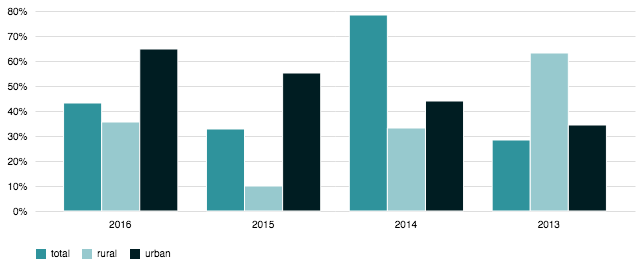

In [40]:
specV3=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 400,
  "height": 240,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {"category":"2017", "subcategory":"total", "value":null},
        {"category":"2017", "subcategory":"rural", "value":null},
        {"category":"2017", "subcategory":"urban", "value":null},
        {"category":"2016", "subcategory":"total", "value":43.1},
        {"category":"2016", "subcategory":"rural", "value":35.6},
        {"category":"2016", "subcategory":"urban", "value":64.9},
        {"category":"2015", "subcategory":"total", "value":32.7},
        {"category":"2015", "subcategory":"rural", "value":10.2},
        {"category":"2015", "subcategory":"urban", "value":55.1},
        {"category":"2014", "subcategory":"total", "value":78.6},
        {"category":"2014", "subcategory":"rural", "value":33.1},
        {"category":"2014", "subcategory":"urban", "value":44.2},
        {"category":"2013", "subcategory":"total", "value":28.6},
        {"category":"2013", "subcategory":"rural", "value":63.1},
        {"category":"2013", "subcategory":"urban", "value":34.2}
      ],
      "transform": [
        {
          "type": "filter",
          "expr": "datum.value != null"
        }
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "category"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {"data": "table", "field": "value"},
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "table", "field": "subcategory"},
      "range": "category"
    }
  ],

  "axes": [
    {
      "orient": "bottom", 
      "scale": "xscale", 
      "domain":false, 
      "ticks": false, 
      "offset": 6, 
      "zindex": 1
    },
    {
      "orient": "left", 
      "scale": "yscale", 
      "domain":false, 
      "ticks": false, 
      "grid": true,
      "offset": 6, 
      "encode":{
        "labels":{
          "update":{
            "text":{"signal": "format(datum.value, '.0f') + '%'"}
         }
       }
      }
    }
  ],

    "legends": [
      {
        "fill": "color",
        "orient":"bottom",
        "direction":"horozontal",
        "symbolType":"square"
    }
  ],
  
  "marks": [
    {
      "type": "group",

      "from": {
        "facet": {
          "data": "table",
          "name": "facet",
          "groupby": "category"
        }
      },

      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "category"}
        }
      },

      "signals": [
        {"name": "width", "update": "bandwidth('xscale')"}
      ],

      "scales": [
        {
          "name": "pos",
          "type": "band",
          "range": "width",
          "domain": {"data": "facet", "field": "subcategory"}
        }
      ],

      "marks": [
        {
          "name": "bars",
          "from": {"data": "facet"},
          "type": "rect",
          "encode": {
            "enter": {
              "x": {"scale": "pos", "field": "subcategory"},
              "width": {"scale": "pos", "band": 1},
              "y": {"scale": "yscale", "field": "value"},
              "y2": {"scale": "yscale", "value": 0},
              "fill": {"scale": "color", "field": "subcategory"},
              "stroke": {"value": "#FFFFFF"}
            },
          "update": {"fillOpacity": {"value": 1}},
          "hover": {"fillOpacity": {"value": 0.8}}
          }
        }
      ]
    }
  ]
}
""")
vega4view=dict(specV3)
vega4view['config']=json.loads(Config)
vega4view['width']=600
vega4view['height']=200
Vega(vega4view)